In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
df = pd.read_csv('/content/drive/MyDrive/booksdatasetwithimages.csv')
print(df.head())

  bookID                                              title  \
0      1  Harry Potter and the Half-Blood Prince (Harry ...   
1      2  Harry Potter and the Order of the Phoenix (Har...   
2      4  Harry Potter and the Chamber of Secrets (Harry...   
3      5  Harry Potter and the Prisoner of Azkaban (Harr...   
4      8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré           4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré           4.49  0439358078  9780439358071   
2                J.K. Rowling           4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré           4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré           4.78  0439682584  9780439682589   

  language_code num_pages  ratings_count  text_reviews_count publication_date  \
0           eng       652      2095690.0             27591.0        9/16/2006   
1       

In [28]:
print(len(df))

11131


In [29]:
# Check for missing values
print(df.isnull().sum())

bookID                0
title                 4
authors               4
average_rating        4
isbn                  0
isbn13                4
language_code         4
num_pages             4
ratings_count         4
text_reviews_count    4
publication_date      4
publisher             4
cover_image_url       0
dtype: int64


In [30]:
# Drop rows with any null values
df.dropna(inplace=True)

print(df.isnull().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
cover_image_url       0
dtype: int64


In [31]:
print(len(df))

11127


In [32]:
# Display data types of each column
print(df.dtypes)

#Alternatively, get a concise summary of the dataframe, including data types
print(df.info())

bookID                 object
title                  object
authors                object
average_rating         object
isbn                   object
isbn13                 object
language_code          object
num_pages              object
ratings_count         float64
text_reviews_count    float64
publication_date       object
publisher              object
cover_image_url        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 0 to 11130
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  object 
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  object 
 8

In [33]:
# Check for non-numeric values in 'average_rating'
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")  # Converts invalid entries to NaN

# Convert other columns safely
df["bookID"] = pd.to_numeric(df["bookID"], errors="coerce").astype("Int64")  # Int64 allows NaN values
df["num_pages"] = pd.to_numeric(df["num_pages"], errors="coerce").astype("Int64")
df["ratings_count"] = pd.to_numeric(df["ratings_count"], errors="coerce").astype("Int64")
df["text_reviews_count"] = pd.to_numeric(df["text_reviews_count"], errors="coerce").astype("Int64")

# Convert publication_date to datetime
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")

# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Data type conversion completed and saved as 'cleaned_dataset.csv'.")

Data type conversion completed and saved as 'cleaned_dataset.csv'.


In [34]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())  # Verify no missing values

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
cover_image_url       0
dtype: int64


In [35]:
print(df_cleaned.shape)  # Check new dataset size

(11121, 13)


In [36]:
print(df_cleaned.isnull().sum())
print(len(df_cleaned))

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
cover_image_url       0
dtype: int64
11121


In [37]:
# Display data types of each column
print(df_cleaned.dtypes)

#Alternatively, get a concise summary of the dataframe, including data types
print(df_cleaned.info())

bookID                         Int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                        object
language_code                 object
num_pages                      Int64
ratings_count                  Int64
text_reviews_count             Int64
publication_date      datetime64[ns]
publisher                     object
cover_image_url               object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 11121 entries, 0 to 11130
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11121 non-null  Int64         
 1   title               11121 non-null  object        
 2   authors             11121 non-null  object        
 3   average_rating      11121 non-null  float64       
 4   isbn                11121 non-null  object        
 5   isbn

In [38]:
print(df_cleaned.describe())  # Summary of numerical columns

             bookID  average_rating   num_pages  ratings_count  \
count       11121.0    11121.000000     11121.0        11121.0   
mean   21307.774301        3.934058  336.343944   17945.119683   
min             1.0        0.000000         0.0            0.0   
25%         10270.0        3.770000       192.0          104.0   
50%         20264.0        3.960000       299.0          745.0   
75%         32104.0        4.140000       416.0         4996.0   
max         45641.0        5.000000      6576.0      4597666.0   
std    13093.542472        0.350513  241.129968  112509.119873   

       text_reviews_count               publication_date  
count             11121.0                          11121  
mean           542.118874  2000-08-29 03:05:33.099541504  
min                   0.0            1900-01-01 00:00:00  
25%                   9.0            1998-07-17 00:00:00  
50%                  47.0            2003-03-01 00:00:00  
75%                 238.0            2005-10-01 00:

<Axes: >

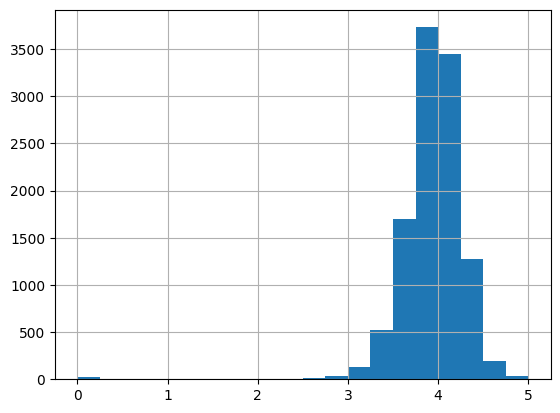

In [39]:
df_cleaned['average_rating'].hist(bins=20)

<Axes: >

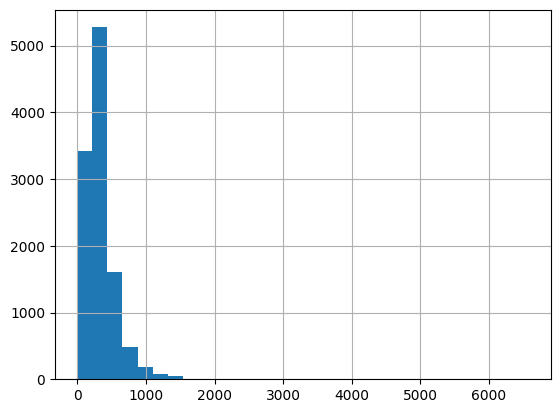

In [40]:
df_cleaned['num_pages'].hist(bins=30)

<Axes: >

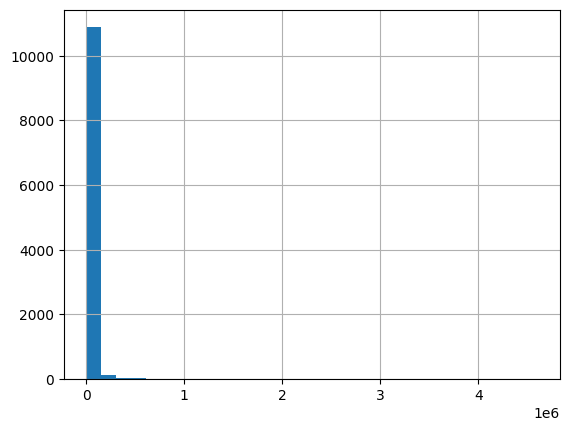

In [41]:
df_cleaned['ratings_count'].hist(bins=30)

In [42]:
print(df_cleaned.isnull().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
cover_image_url       0
dtype: int64


In [43]:
top_rated_books = df_cleaned.nlargest(10, 'average_rating')
print(top_rated_books[['title', 'average_rating']])

                                                  title  average_rating
624   Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...             5.0
786                   Willem de Kooning: Late Paintings             5.0
855   Literature Circle Guide: Bridge to Terabithia:...             5.0
1243  Middlesex Borough (Images of America: New Jersey)             5.0
4127  Zone of the Enders: The 2nd Runner Official St...             5.0
4792  The Diamond Color Meditation: Color Pathway to...             5.0
4937  Bulgakov's the Master and Margarita: The Text ...             5.0
5027  The Complete Theory Fun Factory: Music Theory ...             5.0
5478  The Goon Show  Volume 4: My Knees Have Fallen ...             5.0
5480  The Goon Show  Volume 11: He's Fallen in the W...             5.0


In [44]:
print(df_cleaned['authors'].value_counts().head(10))

authors
P.G. Wodehouse                 40
Stephen King                   40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Mercedes Lackey                29
Sandra Brown                   29
Dick Francis                   28
Margaret Weis/Tracy Hickman    23
Name: count, dtype: int64


In [45]:
print(df_cleaned['publisher'].value_counts().head(10))

publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: count, dtype: int64


<Axes: xlabel='ratings_count', ylabel='average_rating'>

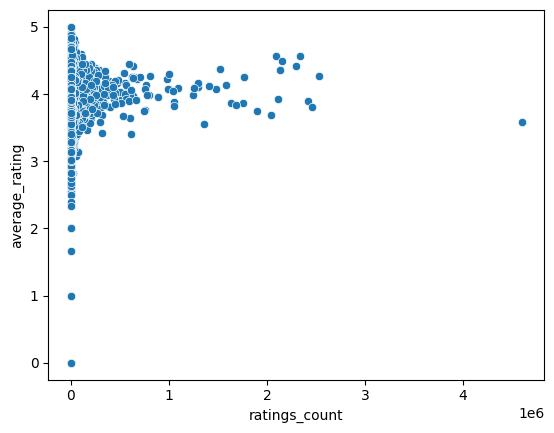

In [46]:
import seaborn as sns
sns.scatterplot(x='ratings_count', y='average_rating', data=df_cleaned)

In [47]:
# Assuming data is stored in df_cleaned
df = df_cleaned.copy()

# Fill missing values (if any)
df['title'] = df['title'].fillna('')
df['authors'] = df['authors'].fillna('')
df['average_rating'] = df['average_rating'].fillna(0).astype(float)

# Combine relevant features into a single column
df['features'] = df['title'] + ' ' + df['authors'] + ' ' + df['average_rating'].astype(str)

# **Step 2: Convert Text to Features (TF-IDF)**
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['features'])

# **Step 3: Compute Cosine Similarity**
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# **Step 4: Function to Recommend Similar Books**
def recommend_books(book_title, num_recommendations=5):
    # Find the book index
    idx = df[df['title'].str.lower() == book_title.lower()].index
    if len(idx) == 0:
        return "Book not found in dataset."
    idx = idx[0]

    # Get similarity scores for all books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort books by similarity score (excluding itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]

    # Get book indices and return titles
    book_indices = [i[0] for i in sim_scores]
    return df.iloc[book_indices][['title', 'authors', 'average_rating']]

# **Example Usage**
print(recommend_books("Harry Potter and the Half-Blood Prince (Harry Potter  #6)"))
# recommend_books("Heirs of General Practice")

                                                  title  \
615   Harry Potter and the Half-Blood Prince (Harry ...   
4417  Harry Potter and the Chamber of Secrets (Harry...   
1     Harry Potter and the Order of the Phoenix (Har...   
8879  Harry Potter and the Sorcerer's Stone (Harry P...   
4     Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                         authors  average_rating  
615                 J.K. Rowling            4.57  
4417  J.K. Rowling/Mary GrandPré            4.42  
1     J.K. Rowling/Mary GrandPré            4.49  
8879  J.K. Rowling/Mary GrandPré            4.47  
4     J.K. Rowling/Mary GrandPré            4.78  


In [50]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming your DataFrame (df) contains the following columns: 'bookID', 'title', 'average_rating', etc.
# Example DataFrame df format:
# df = pd.DataFrame({
#     'bookID': [1, 2, 4, 5, 8],
#     'title': ['Harry Potter and the Half-Blood Prince', 'Harry Potter and the Order of the Phoenix', ...],
#     'average_rating': [4.57, 4.49, 4.42, 4.56, 4.78],
#     ...
# })

# Prepare data for Surprise (bookID, userID, rating)
# Here we'll use bookID as a proxy for userID for simplicity since you may not have actual user data.
df_model = df[['bookID', 'average_rating']]

# Create a reader to specify the rating scale
reader = Reader(rating_scale=(df_model['average_rating'].min(), df_model['average_rating'].max()))

# Load data into the surprise dataset format
data = Dataset.load_from_df(df_model[['bookID', 'bookID', 'average_rating']], reader)

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the SVD model
model = SVD()

# Train the model
model.fit(trainset)

# Make predictions on the testset
predictions = model.test(testset)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error: {rmse}")

# Example of making predictions for bookID 10 (instead of bookID 1)
predicted_rating_10 = model.predict(1, 10)  # Predicting for bookID=10, userID=1 (use bookID as userID)
print(f"Predicted Rating for bookID 10: {predicted_rating_10.est}")

# You can also get the top N recommendations for a user or a book.
# For simplicity, here we predict ratings for all books and then suggest top N.
book_ratings = [(bookID, model.predict(1, bookID).est) for bookID in df['bookID']]
book_ratings.sort(key=lambda x: x[1], reverse=True)

# Show top 5 book recommendations for "user 1"
top_5_recommendations = book_ratings[:5]
print("Top 5 Book Recommendations for User 1:")
for book in top_5_recommendations:
    book_title = df[df['bookID'] == book[0]]['title'].values[0]  # Get the book title
    print(f"Book: {book_title}, Predicted Rating: {book[1]}")


RMSE: 0.3650
Root Mean Squared Error: 0.364953424715571
Predicted Rating for bookID 10: 3.8199930548330214
Top 5 Book Recommendations for User 1:
Book: The Bookseller of Kabul, Predicted Rating: 4.395001205576327
Book: The War of the Flowers, Predicted Rating: 4.385098624044059
Book: Redburn / White-Jacket / Moby-Dick, Predicted Rating: 4.361883288967645
Book: 'Salem's Lot, Predicted Rating: 4.3533790773418115
Book: The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1), Predicted Rating: 4.3427987425795385


In [49]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505179 sha256=b5e8c4773ef5cfd8be8ef9abdc9be768ae6028053588b3a3a11b65186002c944
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
